In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install mplsoccer
!pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
from statsbombpy import sb
import pandas as pd
from pandas import json_normalize
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch, Sbopen

# Get competitions
comp = sb.competitions()
comp.to_csv('competitions.csv', index=False)

In [ ]:
comp = comp[comp['competition_name'] == 'La Liga']
comp = comp[comp['season_id'] != 278]

In [ ]:
comp

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
37,11,90,Spain,La Liga,male,False,False,2020/2021,2023-11-15T10:25:53.245065,2023-11-15T10:29:14.475865,2023-11-15T10:29:14.475865,2023-11-15T10:25:53.245065
38,11,42,Spain,La Liga,male,False,False,2019/2020,2024-03-10T11:29:39.412759,2021-06-13T16:17:31.694,None,2024-03-10T11:29:39.412759
39,11,4,Spain,La Liga,male,False,False,2018/2019,2024-03-10T11:29:26.339305,2021-07-09T14:53:22.103024,None,2024-03-10T11:29:26.339305
40,11,1,Spain,La Liga,male,False,False,2017/2018,2024-05-13T13:07:18.149811,2021-06-13T16:17:31.694,None,2024-05-13T13:07:18.149811
41,11,2,Spain,La Liga,male,False,False,2016/2017,2024-03-12T08:49:46.449084,2021-06-13T16:17:31.694,None,2024-03-12T08:49:46.449084
42,11,27,Spain,La Liga,male,False,False,2015/2016,2024-05-16T14:06:52.149840,2021-06-13T16:17:31.694,None,2024-05-16T14:06:52.149840
43,11,26,Spain,La Liga,male,False,False,2014/2015,2023-09-20T17:22:28.925900,2021-06-13T16:17:31.694,None,2023-09-20T17:22:28.925900
44,11,25,Spain,La Liga,male,False,False,2013/2014,2022-07-23T12:18:49.547396,2021-06-13T16:17:31.694,None,2022-07-23T12:18:49.547396
45,11,24,Spain,La Liga,male,False,False,2012/2013,2024-03-10T11:24:05.201066,2021-06-13T16:17:31.694,None,2024-03-10T11:24:05.201066
46,11,23,Spain,La Liga,male,False,False,2011/2012,2022-12-01T14:10:17.791769,2021-06-13T16:17:31.694,None,2022-12-01T14:10:17.791769


In [ ]:
# This assumes 'comp' is your DataFrame containing Messi's season information
season_ids = comp['season_id'].unique()

all_matches = []

for season_id in season_ids:
    matches = sb.matches(competition_id=11, season_id=season_id)
    all_matches.append(matches)

# Combine all match DataFrames into one
df_matches = pd.concat(all_matches, ignore_index=True)

In [ ]:
barcelona_matches = df_matches[(df_matches['home_team'] == 'Barcelona') | (df_matches['away_team'] == 'Barcelona')]
# Sort matches by date:
barcelona_matches = barcelona_matches.sort_values(by='match_date', ascending=True)
barcelona_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
866,68353,2004-10-16,22:00:00.000,Spain - La Liga,2004/2005,Espanyol,Barcelona,0,1,available,...,2021-06-13T16:17:31.694,7,Regular Season,Estadi Olímpic Lluís Companys,Carlos Megía Dávila,Miguel Ángel Lotina Oruecheberría,Frank Rijkaard,1.1.0,2,2
861,68313,2004-10-24,21:00:00.000,Spain - La Liga,2004/2005,Barcelona,Osasuna,3,0,available,...,2021-06-13T16:17:31.694,8,Regular Season,Spotify Camp Nou,Vicente José Lizondo Cortés,Frank Rijkaard,Javier Aguirre Onaindía,1.1.0,2,2
860,68314,2004-12-04,20:00:00.000,Spain - La Liga,2004/2005,Barcelona,Málaga,4,0,available,...,2021-06-13T16:17:31.694,14,Regular Season,Spotify Camp Nou,José Omar Losantos,Frank Rijkaard,Gregorio Manzano Ballesteros,1.1.0,2,2
864,69153,2004-12-11,20:00:00.000,Spain - La Liga,2004/2005,Albacete,Barcelona,1,2,available,...,2021-06-13T16:17:31.694,15,Regular Season,Estadio Carlos Belmonte,Alfonso Perez Burrull,José Manuel González López,Frank Rijkaard,1.1.0,2,2
863,68315,2004-12-21,20:00:00.000,Spain - La Liga,2004/2005,Barcelona,Levante UD,2,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,Spotify Camp Nou,David Fernández Borbalan,Frank Rijkaard,Bernd Schuster,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3773586,2021-04-29,19:00:00.000,Spain - La Liga,2020/2021,Barcelona,Granada,1,2,available,...,2022-08-04T12:00,33,Regular Season,Spotify Camp Nou,Pablo González Fuertes,Ronald Koeman,Diego Martínez Penas,1.1.0,2,2
18,3773695,2021-05-02,21:00:00.000,Spain - La Liga,2020/2021,Valencia,Barcelona,2,3,available,...,2022-08-04T12:00,34,Regular Season,Estadio de Mestalla,José María Sánchez Martínez,Javier Gracia Carlos,Ronald Koeman,1.1.0,2,2
16,3773372,2021-05-08,16:15:00.000,Spain - La Liga,2020/2021,Barcelona,Atlético Madrid,0,0,available,...,2022-08-04T12:00,35,Regular Season,Spotify Camp Nou,Antonio Miguel Mateu Lahoz,Ronald Koeman,Diego Pablo Simeone,1.1.0,2,2
17,3773387,2021-05-11,22:00:00.000,Spain - La Liga,2020/2021,Levante UD,Barcelona,3,3,available,...,2022-08-04T12:00,36,Regular Season,Estadio Ciudad de Valencia,José Luis Munuera Montero,Francisco José López Fernández,Ronald Koeman,1.1.0,2,2


In [ ]:
messi_actions = []

for index, match in barcelona_matches.iterrows():
    game = sb.events(match_id=match['match_id'])
    messi_events = game[game['player'] == 'Lionel Andrés Messi Cuccittini']

    # Only add a column for season if messi_events is not empty
    if not messi_events.empty:
        messi_events.loc[:, 'season'] = match['season']
        messi_actions.append(messi_events)
    else:
        print(f"No Messi events found for match {match['match_id']}")

# Combine all Messi's actions into a single DataFrame
messi_actions_df = pd.concat(messi_actions, ignore_index=True) if messi_actions else pd.DataFrame()

<ipython-input-7-abb6122f2ebf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_events.loc[:, 'season'] = match['season']
<ipython-input-7-abb6122f2ebf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_events.loc[:, 'season'] = match['season']
<ipython-input-7-abb6122f2ebf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

No Messi events found for match 3825617
No Messi events found for match 3825627
No Messi events found for match 3825637
No Messi events found for match 3825645
No Messi events found for match 3825660


<ipython-input-7-abb6122f2ebf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_events.loc[:, 'season'] = match['season']
<ipython-input-7-abb6122f2ebf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_events.loc[:, 'season'] = match['season']
<ipython-input-7-abb6122f2ebf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
messi_actions_df

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,goalkeeper_success_in_play,dribble_no_touch,half_end_early_video_end,goalkeeper_lost_in_play,goalkeeper_success_out,half_start_late_video_start,shot_follows_dribble,goalkeeper_lost_out,player_off_permanent,goalkeeper_saved_to_post
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
messi_shots = messi_actions_df[messi_actions_df['type'] == 'Shot']
messi_shots.to_csv('messi_shots.csv', index=True)
messi_shots

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,goalkeeper_success_in_play,dribble_no_touch,half_end_early_video_end,goalkeeper_lost_in_play,goalkeeper_success_out,half_start_late_video_start,shot_follows_dribble,goalkeeper_lost_out,player_off_permanent,goalkeeper_saved_to_post
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = messi_shots

In [ ]:
print(df.head())

# Step 3: Create a table containing seasons with counts of each shot outcome
# Group data by 'season' and 'shot_outcome' and count occurrences
shot_data = df.groupby(['season', 'shot_outcome']).size().unstack(fill_value=0)

# Display the shot data grouped by season and outcome
print(shot_data)

# Step 4: Add a column for total shots per season
shot_data['total_shots'] = shot_data.sum(axis=1)

# Step 5: Calculate accumulative sum of xG per season
shot_data['accumulative_xg'] = df.groupby('season')['shot_statsbomb_xg'].sum()

# Display the final table with total shots and accumulative xg per season
print(shot_data)

    ball_receipt_outcome ball_recovery_offensive  \
55                   NaN                     NaN   
75                   NaN                     NaN   
76                   NaN                     NaN   
155                  NaN                     NaN   
156                  NaN                     NaN   

    ball_recovery_recovery_failure block_deflection carry_end_location  \
55                             NaN              NaN                NaN   
75                             NaN              NaN                NaN   
76                             NaN              NaN                NaN   
155                            NaN              NaN                NaN   
156                            NaN              NaN                NaN   

    clearance_aerial_won clearance_body_part clearance_head  \
55                   NaN                 NaN            NaN   
75                   NaN                 NaN            NaN   
76                   NaN                 NaN         

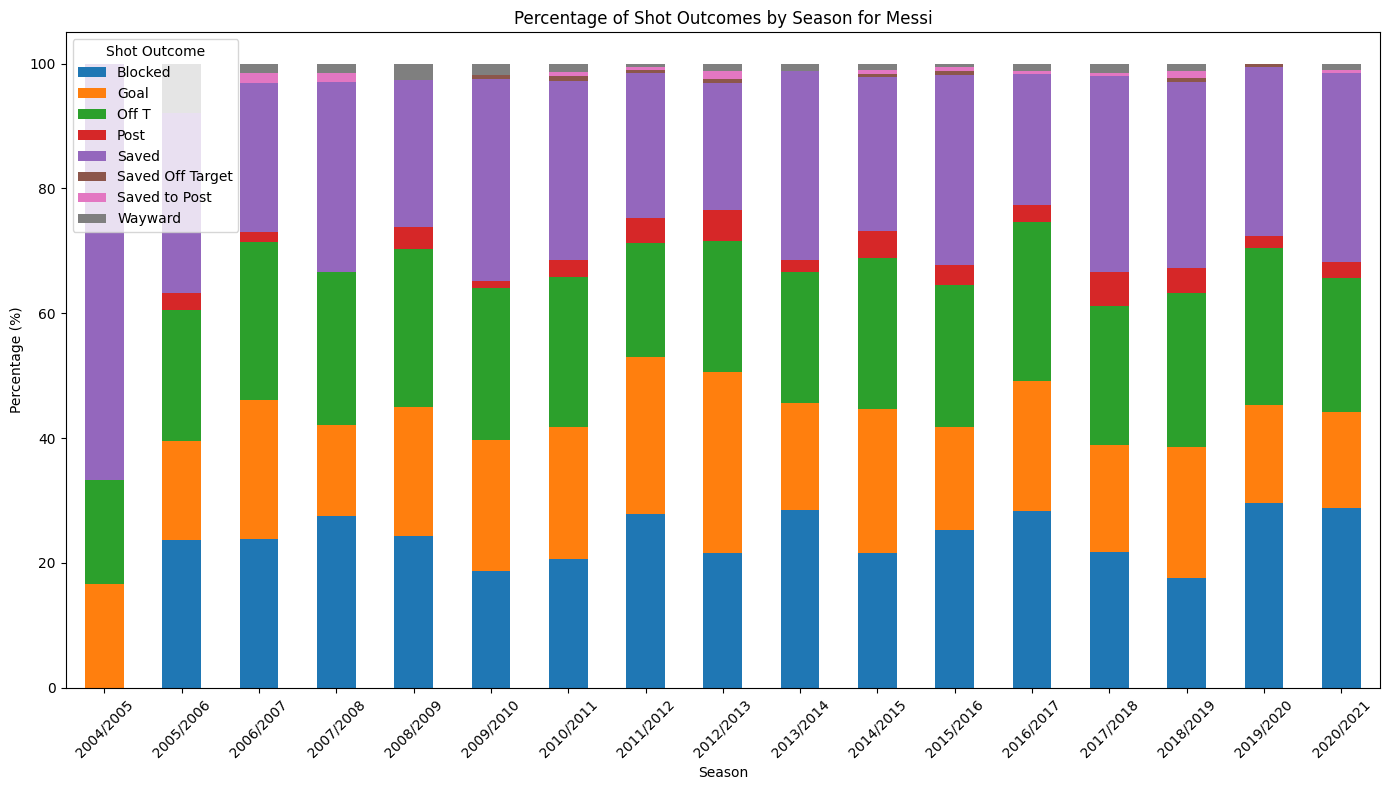

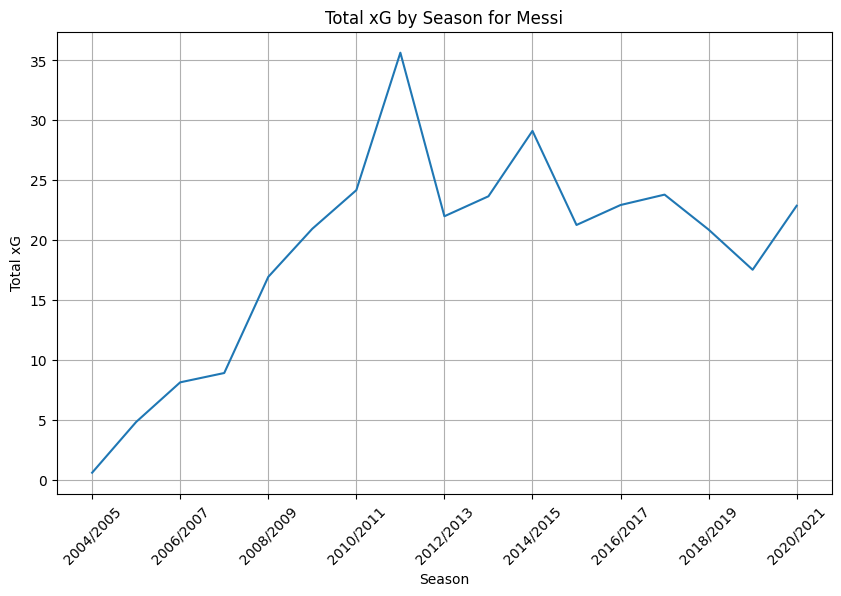

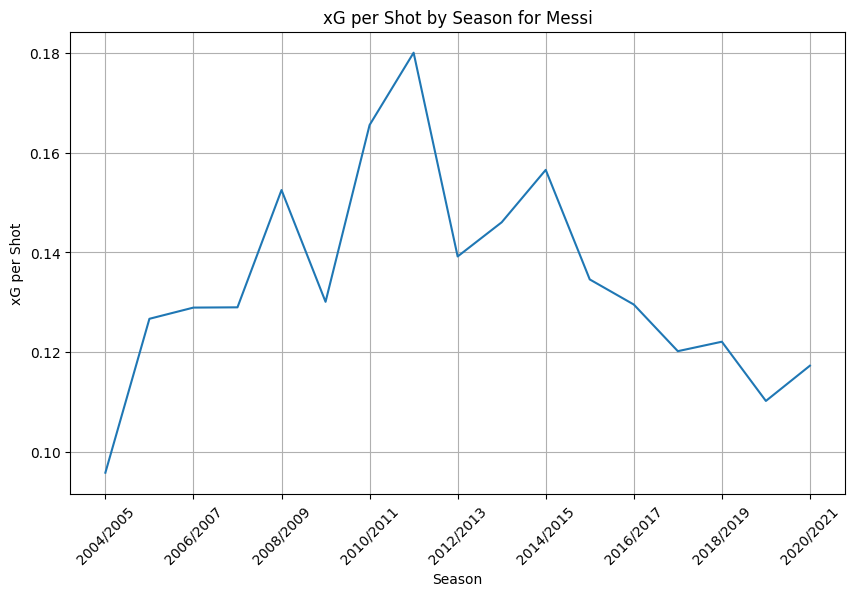

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the data (ensure that messi_shots.csv is available)
df = pd.read_csv('messi_shots.csv')

# Group and count shot outcomes per season
outcome_counts = df.groupby(['season', 'shot_outcome']).size().unstack(fill_value=0)
total_shots_per_season = outcome_counts.sum(axis=1)
outcome_percentage = outcome_counts.div(total_shots_per_season, axis=0) * 100

# Sort by seasons
outcome_percentage.sort_index(inplace=True)

# Step 3: Plot the percentage of shot outcomes per season
fig, ax = plt.subplots(figsize=(14, 8))
outcome_percentage.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Percentage of Shot Outcomes by Season for Messi')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Season')
plt.xticks(rotation=45)
plt.legend(title='Shot Outcome')
plt.tight_layout()

# Step 4: Plot total xG over seasons
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('season')['shot_statsbomb_xg'].sum().plot(ax=ax)
ax.set_title('Total xG by Season for Messi')
ax.set_ylabel('Total xG')
ax.set_xlabel('Season')
plt.xticks(rotation=45)
plt.grid(True)

# Step 5: Calculate xG per shot and plot it
xg_per_shot = df.groupby('season')['shot_statsbomb_xg'].sum() / total_shots_per_season
fig, ax = plt.subplots(figsize=(10, 6))
xg_per_shot.plot(ax=ax)
ax.set_title('xG per Shot by Season for Messi')
ax.set_ylabel('xG per Shot')
ax.set_xlabel('Season')
plt.xticks(rotation=45)
plt.grid(True)

# Show all plots
plt.show()

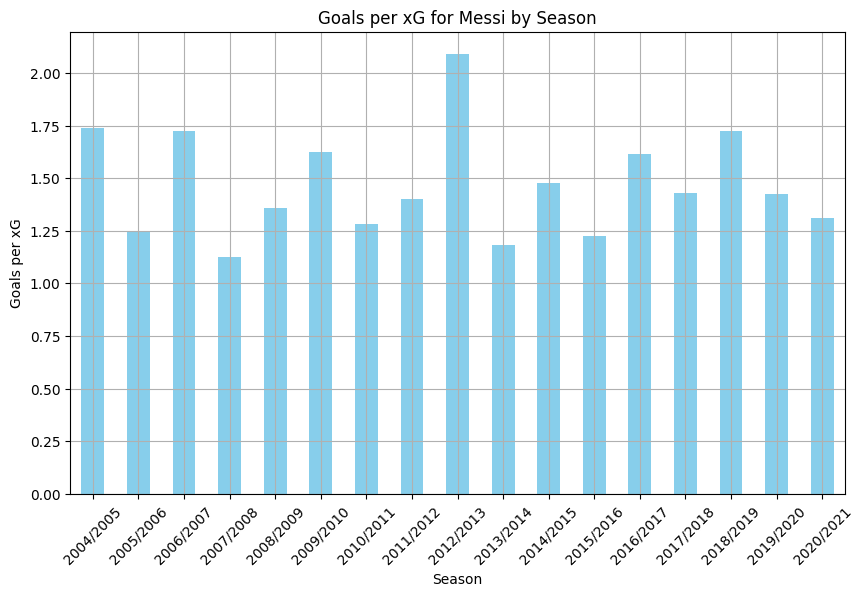

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded as per previous instructions

# Step 1: Group by 'season' and calculate the necessary metrics
seasonal_data = df.groupby('season').agg({
    'shot_statsbomb_xg': 'sum',  # Total xG per season
    'shot_outcome': lambda x: (x == 'Goal').sum()  # Count of goals per season
}).rename(columns={'shot_outcome': 'total_goals'})

# Step 2: Calculate Goals per xG
seasonal_data['goals_per_xg'] = seasonal_data['total_goals'] / seasonal_data['shot_statsbomb_xg']

# Step 3: Plot Goals per xG over seasons
plt.figure(figsize=(10, 6))
seasonal_data['goals_per_xg'].plot(kind='bar', color='skyblue')
plt.title('Goals per xG for Messi by Season')
plt.ylabel('Goals per xG')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
